Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [136]:
import pandas as pd
import seaborn as sbn
import sqlite3
import json
import numpy as np
import matplotlib.pyplot as plt
import ast
import os

In [137]:
#directory variables
current_directory = os.getcwd()
parent_directory = os.path.dirname(current_directory)

In [138]:
#stations infomation from city bikes API
stations=pd.read_csv(parent_directory+'/data/initial_stations_df.csv')
#station ID with lat longs and elevations
stat_elev=pd.read_csv(parent_directory+'/data/Station_Elevations.csv')

In [139]:
#merge stations with station elevation
stations.rename(columns={'id':'station_id'}, inplace=True)
stations=stations.merge(stat_elev, on='station_id')
stations

empty_slots  free_bikes                        station_id  latitude_x  \
0              1          13  d0e8f4f1834b7b33a3faf8882f567ab8   37.849735   
1              6           5  983514094dd808b1604da2dcfc2d09af   37.336188   
2             12          11  da17603652106fda93da4e255a5b0a22   37.322125   
3             14           0  7a21c92b3b4cd2f7759107b4fdebf869   37.323678   
4             24           2  ce34d38fb230a23c1ced12d1e16df294   37.325998   
..           ...         ...                               ...         ...   
519            5           0  d2ac19a2bb356f022983008bcd6ca5e1   37.767820   
520            3           5  db8d54f6cc7dcbbf1d74783000539749   37.770938   
521            5           0  6aba782b9e02d7ae351e6e9f81a7c330   37.768730   
522            9          10  1b3d97eca9393abbf229aef9b3f80fda   37.731921   
523           24           3  051b0abcc6ba494a27fc5ee5b0f8acf7   37.768384   

     longitude_x                        name                    timestamp  \
0    -122.270582     Harmon St at Adeline St  2023-08-22T02:33:57.545000Z   
1    -121.889277  Fountain Alley at S 2nd St  2023-08-22T02:33:57.120000Z   
2    -121.881090            Oak St at 1st St  2023-08-22T02:33:57.524000Z   
3    -121.874119             Bestor Art Park  2023-08-22T02:33:57.243000Z   
4    -121.877120       5th St at Virginia St  2023-08-22T02:33:57.456000Z   
..           ...                         ...                          ...   
519  -122.501868              Chain O' Lakes  2023-08-22T02:33:57.057000Z   
520  -122.477116                  Stowe Lake  2023-08-22T02:33:57.058000Z   
521  -122.459429               Bowling Green  2023-08-22T02:33:57.060000Z   
522  -122.389886       Lane St at Revere Ave  2023-08-22T02:33:57.561000Z   
523  -122.451967     Waller St at Shrader St  2023-08-22T02:33:57.428000Z   

     extra_ebikes  extra_has_ebikes  extra_last_updated  ...  \
0               0              True          1692671559  ...   
1               0              True          1692671546  ...   
2               0              True          1692671450  ...   
3               0              True          1692671557  ...   
4               1              True          1692671522  ...   
..            ...               ...                 ...  ...   
519             0              True          1691418718  ...   
520             5              True          1691418745  ...   
521             0              True          1691418758  ...   
522             2              True          1692671481  ...   
523             3              True          1692671543  ...   

               extra_rental_uris_android                extra_rental_uris_ios  \
0    https://sfo.lft.to/lastmile_qr_scan  https://sfo.lft.to/lastmile_qr_scan   
1    https://sfo.lft.to/lastmile_qr_scan  https://sfo.lft.to/lastmile_qr_scan   
2    https://sfo.lft.to/lastmile_qr_scan  https://sfo.lft.to/lastmile_qr_scan   
3    https://sfo.lft.to/lastmile_qr_scan  https://sfo.lft.to/lastmile_qr_scan   
4    https://sfo.lft.to/lastmile_qr_scan  https://sfo.lft.to/lastmile_qr_scan   
..                                   ...                                  ...   
519  https://sfo.lft.to/lastmile_qr_scan  https://sfo.lft.to/lastmile_qr_scan   
520  https://sfo.lft.to/lastmile_qr_scan  https://sfo.lft.to/lastmile_qr_scan   
521  https://sfo.lft.to/lastmile_qr_scan  https://sfo.lft.to/lastmile_qr_scan   
522  https://sfo.lft.to/lastmile_qr_scan  https://sfo.lft.to/lastmile_qr_scan   
523  https://sfo.lft.to/lastmile_qr_scan  https://sfo.lft.to/lastmile_qr_scan   

    extra_renting extra_returning  extra_slots  \
0               1               1           15   
1               1               1           11   
2               1               1           23   
3               1               1           15   
4               1               1           27   
..            ...             ...          ...   
519             1               1            5   
5

In [140]:
station_size=stations['free_bikes']+stations['empty_slots']
use_ratio=stations['free_bikes']/station_size

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

<Axes: xlabel='free_bikes', ylabel='elevation'>

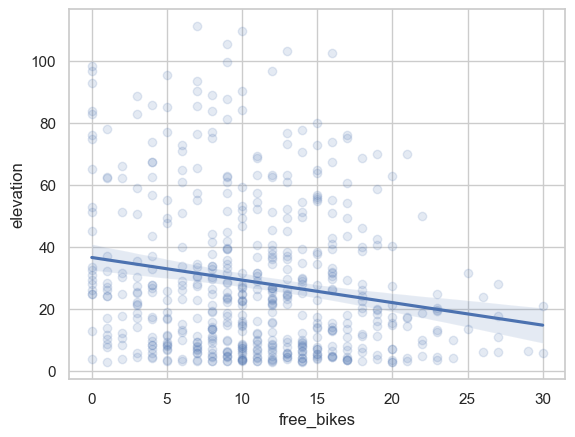

In [141]:
sbn.regplot(data=stations, x='free_bikes', y='elevation', scatter_kws={'alpha':0.15})

There is a slight trend where the number of free bikes increases as elevation falls.

This may be caused by riders tending to take trips that are  downhill. 

Some lurking variables may be the size of the bike station rentals being greater at lower elevations, so it would be less likely (or impossible) for there to be more 25-30 free bikes if the total station size is never that high for stations at high elevations 

I will now look to see if there is any correlation between station size and elevation:

In [142]:
station_size.describe()

count    524.000000
mean      21.032443
std        5.677174
min        1.000000
25%       18.000000
50%       20.000000
75%       25.000000
max       41.000000
dtype: float64

<Axes: ylabel='elevation'>

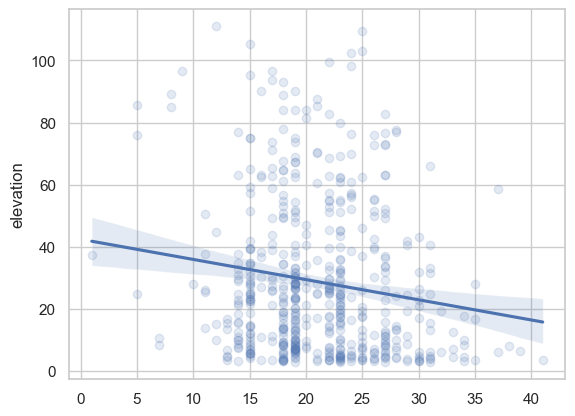

In [143]:
sbn.regplot(data=stations, x=station_size, y='elevation', scatter_kws={'alpha':0.15})

<Axes: xlabel='extra_slots', ylabel='elevation'>

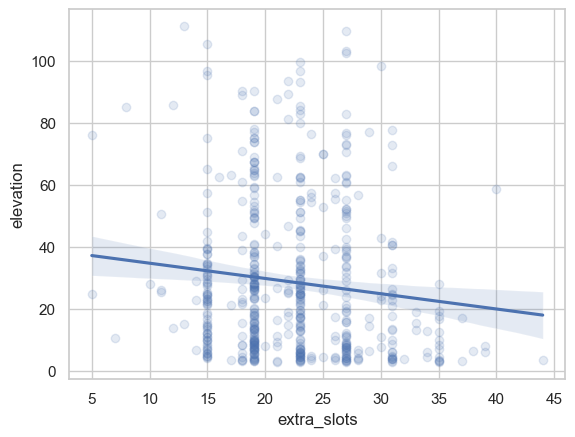

In [144]:
sbn.regplot(data=stations, x='extra_slots', y='elevation', scatter_kws={'alpha':0.15})

It seems there are no large stations (>30 spots) above 80m, while there are about 5 stations between size 5-10 above 80m. This might cause some issues with using the actual numbers. Perhaps using normalized values would be better...

<Axes: ylabel='elevation'>

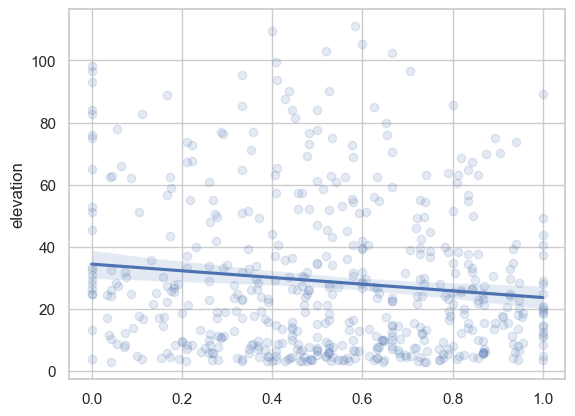

In [145]:
sbn.regplot(data=stations, x=use_ratio, y='elevation', scatter_kws={'alpha':0.15})

So the trend appears to have become less noticable, if not non-existent using the use ratio. free_bikes/station_size 

Upon reflection, this may be because the system is dynamic and therefore any sustained trend of bikes piling up at lower elevations is not sustainable, eventually there would be no bikes at higher elevations

If their is a trend of riders preferring downhill routes between stations, the trend would have to be offset b station workers moving the bikes back to higher locations periodically and therefore a single timeslice of the data would not show the trend


Further tables would have to be analyzed, tracking activity levels, and somehow flagging events that are not trips done by customers. Or perhaps taking multiple timeslices throughout the day and seeing what the chances are for a bike to be free at any given time. Unless the restocking happens very often, you should still see affects of customer trips

# Using Yelp and Foursquare Data

##### We have elevation data from each venue from Foursquare and Yelp. I will use this to measure
- ###### if a bike station is higher or lower than the mean of venues
    - get an average elevation for venues within a 100m area of the bike station
    - check wether the station elevation is signficantly higher or lower. (more than 1m higher or lower should be enough)
    
- ##### if the bike station is likely to be in a hilly location with respect to venues
    - is the spread betwen max and min large
    - if there are enough venues, look at the std
    - this will only be appropriate for stations with more than two venues and be more useful the more venues there are

In [146]:
yelp_venue_elev=pd.read_csv(parent_directory+'/data/yelp_venue_elev.csv')
yelp_venue_elev

yelp_venue_id   Longitude   Latitude  Elevation
0     QB7-zmun5zXhnNnGXs-LDA -122.269850  37.809050   7.224932
1     3k0Nz03m8rKDiGHtMevBFQ -121.900830  37.332970  25.688417
2     xfGxyVapMNlAlqQULvyG5Q -122.422302  37.744076  29.704712
3     humRe1SGupNdDJUxEdDmMg -122.421562  37.759861  16.017796
4     ocbfMG-H8Ov8v5nz1AjlZg -122.024290  36.970170   4.286106
...                      ...         ...        ...        ...
1945  ogb0Fb6T0t60ls16jED3jw -121.912002  37.332848  30.280857
1946  _gHU7DSK2gFVRLx651c8ig -122.421460  37.773256  16.575678
1947  LxnbHJlFKjHRZeQqo3Tm5Q -122.434364  37.788940  52.898926
1948  gg--F2Z-X2Qh1fkkm1ODHA -122.414823  37.804010   7.037208
1949  2ziP1oSBhCjY9I_i-zKhjQ -122.244954  37.791784  10.250802

[1950 rows x 4 columns]

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [147]:


# Connect to the database or create if not exists
connection = sqlite3.connect('CityBike_Project.db')
conn=connection
# Create a cursor
cursor = connection.cursor()
# Create a table
create_table_query ="CREATE TABLE IF NOT EXISTS stations (station_id TEXT PRIMARY KEY,longitude REAL,latitude REAL,elevation REAL)"
cursor.execute(create_table_query)

connection.commit()


In [148]:
  

df=stations

# Specify the table name and insert the data
table_name = "stations"  
df.to_sql(table_name, connection, if_exists='replace', index=False)



524

Look at the data before and after the join to validate your data.

In [149]:

cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
table_names = cursor.fetchall()
table_names

[('elevation_comparison',),
 ('yelp_venue_elev',),
 ('stat_ylp_venues',),
 ('stations_venues_yelp_melted',),
 ('stations',)]

In [150]:
cursor.execute("SELECT * FROM stations;")
rows = cursor.fetchall()

In [151]:
df = pd.DataFrame(rows, columns=[col[0] for col in cursor.description])

In [152]:
df.head(5)


empty_slots  free_bikes                        station_id  latitude_x  \
0            1          13  d0e8f4f1834b7b33a3faf8882f567ab8   37.849735   
1            6           5  983514094dd808b1604da2dcfc2d09af   37.336188   
2           12          11  da17603652106fda93da4e255a5b0a22   37.322125   
3           14           0  7a21c92b3b4cd2f7759107b4fdebf869   37.323678   
4           24           2  ce34d38fb230a23c1ced12d1e16df294   37.325998   

   longitude_x                        name                    timestamp  \
0  -122.270582     Harmon St at Adeline St  2023-08-22T02:33:57.545000Z   
1  -121.889277  Fountain Alley at S 2nd St  2023-08-22T02:33:57.120000Z   
2  -121.881090            Oak St at 1st St  2023-08-22T02:33:57.524000Z   
3  -121.874119             Bestor Art Park  2023-08-22T02:33:57.243000Z   
4  -121.877120       5th St at Virginia St  2023-08-22T02:33:57.456000Z   

   extra_ebikes  extra_has_ebikes  extra_last_updated  ...  \
0             0                 1          1692671559  ...   
1             0                 1          1692671546  ...   
2             0                 1          1692671450  ...   
3             0                 1          1692671557  ...   
4             1                 1          1692671522  ...   

             extra_rental_uris_android                extra_rental_uris_ios  \
0  https://sfo.lft.to/lastmile_qr_scan  https://sfo.lft.to/lastmile_qr_scan   
1  https://sfo.lft.to/lastmile_qr_scan  https://sfo.lft.to/lastmile_qr_scan   
2  https://sfo.lft.to/lastmile_qr_scan  https://sfo.lft.to/lastmile_qr_scan   
3  https://sfo.lft.to/lastmile_qr_scan  https://sfo.lft.to/lastmile_qr_scan   
4  https://sfo.lft.to/lastmile_qr_scan  https://sfo.lft.to/lastmile_qr_scan   

  extra_renting extra_returning  extra_slots  \
0             1               1           15   
1             1               1           11   
2             1               1           23   
3             1               1           15   
4             1               1           27   

                              extra_uid  extra_address longitude_y latitude_y  \
0  fd89514c-f878-4cd5-8113-8e5beead44de           None -122.270582  37.849735   
1  d12ba265-5bfe-4a00-a19a-a7299822bd65           None -121.889277  37.336188   
2  0fd9a51c-67ac-4048-b531-bff644b82f47           None -121.881090  37.322125   
3  46b4ef45-b06b-40eb-9fdf-9bc8ff104a4f           None -121.874119  37.323678   
4  bb54f5c8-5578-4167-9599-8e55154de4fd           None -121.877120  37.325998   

   elevation  
0  32.928356  
1  25.925880  
2  31.710926  
3  30.782372  
4  30.175741  

[5 rows x 22 columns]

In [153]:
stations.head(5)

empty_slots  free_bikes                        station_id  latitude_x  \
0            1          13  d0e8f4f1834b7b33a3faf8882f567ab8   37.849735   
1            6           5  983514094dd808b1604da2dcfc2d09af   37.336188   
2           12          11  da17603652106fda93da4e255a5b0a22   37.322125   
3           14           0  7a21c92b3b4cd2f7759107b4fdebf869   37.323678   
4           24           2  ce34d38fb230a23c1ced12d1e16df294   37.325998   

   longitude_x                        name                    timestamp  \
0  -122.270582     Harmon St at Adeline St  2023-08-22T02:33:57.545000Z   
1  -121.889277  Fountain Alley at S 2nd St  2023-08-22T02:33:57.120000Z   
2  -121.881090            Oak St at 1st St  2023-08-22T02:33:57.524000Z   
3  -121.874119             Bestor Art Park  2023-08-22T02:33:57.243000Z   
4  -121.877120       5th St at Virginia St  2023-08-22T02:33:57.456000Z   

   extra_ebikes  extra_has_ebikes  extra_last_updated  ...  \
0             0              True          1692671559  ...   
1             0              True          1692671546  ...   
2             0              True          1692671450  ...   
3             0              True          1692671557  ...   
4             1              True          1692671522  ...   

             extra_rental_uris_android                extra_rental_uris_ios  \
0  https://sfo.lft.to/lastmile_qr_scan  https://sfo.lft.to/lastmile_qr_scan   
1  https://sfo.lft.to/lastmile_qr_scan  https://sfo.lft.to/lastmile_qr_scan   
2  https://sfo.lft.to/lastmile_qr_scan  https://sfo.lft.to/lastmile_qr_scan   
3  https://sfo.lft.to/lastmile_qr_scan  https://sfo.lft.to/lastmile_qr_scan   
4  https://sfo.lft.to/lastmile_qr_scan  https://sfo.lft.to/lastmile_qr_scan   

  extra_renting extra_returning  extra_slots  \
0             1               1           15   
1             1               1           11   
2             1               1           23   
3             1               1           15   
4             1               1           27   

                              extra_uid  extra_address longitude_y latitude_y  \
0  fd89514c-f878-4cd5-8113-8e5beead44de            NaN -122.270582  37.849735   
1  d12ba265-5bfe-4a00-a19a-a7299822bd65            NaN -121.889277  37.336188   
2  0fd9a51c-67ac-4048-b531-bff644b82f47            NaN -121.881090  37.322125   
3  46b4ef45-b06b-40eb-9fdf-9bc8ff104a4f            NaN -121.874119  37.323678   
4  bb54f5c8-5578-4167-9599-8e55154de4fd            NaN -121.877120  37.325998   

   elevation  
0  32.928356  
1  25.925880  
2  31.710926  
3  30.782372  
4  30.175741  

[5 rows x 22 columns]

import list of venues for yelp

# Cleaning Yelp venues database of lat long tuples so there is only store id

In [154]:
stat_ylp_venues=pd.read_csv(parent_directory+'/data/df_yelp_head_tail_250.csv')

In [155]:
stat_ylp_venues.head(5)

station_id  \
0  d0e8f4f1834b7b33a3faf8882f567ab8   
1  983514094dd808b1604da2dcfc2d09af   
2  da17603652106fda93da4e255a5b0a22   
3  7a21c92b3b4cd2f7759107b4fdebf869   
4  ce34d38fb230a23c1ced12d1e16df294   

                                             store_1  \
0  ('OjMumhyL26n5fDZ2CQLnyg', 37.850300662973346,...   
1  ('berEiBE0fDM-HiYFEAf-Ww', 37.3361378, -121.88...   
2                                                NaN   
3  ('5bWsqTiJ-WiLz0tdMwBg7Q', 37.3234314189821, -...   
4                                                NaN   

                                             store_2  \
0  ('-EpmBwODsvQ6gHx2IuVO5w', 37.85001740687401, ...   
1  ('qArqv7Sl3-kz7m-I0-pyuw', 37.336263, -121.889...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                            store_3  \
0  ('LP6NBMIa3dxinjgtOxMEZg', 37.85004, -122.27053)   
1  ('-A2EzuWuOhzGW2mkzr9sLg', 37.33638, -121.88988)   
2                                               NaN   
3                                               NaN   
4                                               NaN   

                                             store_4  \
0  ('guObf4lR-TsRD1IHJni06g', 37.849494934082, -1...   
1  ('KZM6GxmdYak3ahLUJuWmZw', 37.3367777, -121.88...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                             store_5  \
0  ('3twXqUphnT3qi4ThSzQwQQ', 37.8492637746169, -...   
1  ('HzReUs8NWZN15ntyHfH-mA', 37.336321680671986,...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                             store_6  \
0                                                NaN   
1  ('umMDGhsrt-Zhv6ZIw1aPdw', 37.3369476067549, -...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                            store_7  \
0                                               NaN   
1  ('RMsYXfBmpmAye5a9IyN2SA', 37.33668, -121.88895)   
2                                               NaN   
3                                               NaN   
4                                               NaN   

                                             store_8  \
0                                                NaN   
1  ('ND5BY7eKMCeeu2kcQEwXxg', 37.3369298871105, -...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                             store_9  ...  \
0                                                NaN  ...   
1  ('bwEFBcw8y30lqtAMWXLPxg', 37.3352859388708, -...  ...   
2                                                NaN  ...   
3                                                NaN  ...   
4                                                NaN  ...   

                                            store_11  \
0                                                NaN   
1  ('lhh0RQP0SRd1YTKwkEKZCg', 37.335379312495746,...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                            store_12  \
0                                                NaN   
1  ('pWUaPh4yHqe6GekSzJzcug', 37.3370318639, -121...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                            store_13  \
0        

In [156]:
n=len(stat_ylp_venues)

for rowindex in range(n):
    for col_name in (stat_ylp_venues.columns[1:21]):
        if pd.notna(stat_ylp_venues[col_name][rowindex]):
            stat_ylp_venues[col_name][rowindex]=ast.literal_eval(stat_ylp_venues[col_name][rowindex])[0]
            




In [157]:
#cleaned of lat longs in store
stat_ylp_venues.head(5)

station_id                 store_1  \
0  d0e8f4f1834b7b33a3faf8882f567ab8  OjMumhyL26n5fDZ2CQLnyg   
1  983514094dd808b1604da2dcfc2d09af  berEiBE0fDM-HiYFEAf-Ww   
2  da17603652106fda93da4e255a5b0a22                     NaN   
3  7a21c92b3b4cd2f7759107b4fdebf869  5bWsqTiJ-WiLz0tdMwBg7Q   
4  ce34d38fb230a23c1ced12d1e16df294                     NaN   

                  store_2                 store_3                 store_4  \
0  -EpmBwODsvQ6gHx2IuVO5w  LP6NBMIa3dxinjgtOxMEZg  guObf4lR-TsRD1IHJni06g   
1  qArqv7Sl3-kz7m-I0-pyuw  -A2EzuWuOhzGW2mkzr9sLg  KZM6GxmdYak3ahLUJuWmZw   
2                     NaN                     NaN                     NaN   
3                     NaN                     NaN                     NaN   
4                     NaN                     NaN                     NaN   

                  store_5                 store_6                 store_7  \
0  3twXqUphnT3qi4ThSzQwQQ                     NaN                     NaN   
1  HzReUs8NWZN15ntyHfH-mA  umMDGhsrt-Zhv6ZIw1aPdw  RMsYXfBmpmAye5a9IyN2SA   
2                     NaN                     NaN                     NaN   
3                     NaN                     NaN                     NaN   
4                     NaN                     NaN                     NaN   

                  store_8                 store_9  ...  \
0                     NaN                     NaN  ...   
1  ND5BY7eKMCeeu2kcQEwXxg  bwEFBcw8y30lqtAMWXLPxg  ...   
2                     NaN                     NaN  ...   
3                     NaN                     NaN  ...   
4                     NaN                     NaN  ...   

                 store_11                store_12                store_13  \
0                     NaN                     NaN                     NaN   
1  lhh0RQP0SRd1YTKwkEKZCg  pWUaPh4yHqe6GekSzJzcug  LmBPTn52vSmaCTpKnwSJ4A   
2                     NaN                     NaN                     NaN   
3                     NaN                     NaN                     NaN   
4                     NaN                     NaN                     NaN   

                 store_14                store_15                store_16  \
0                     NaN                     NaN                     NaN   
1  e-f4l-iml9QbM50REiR0rQ  SQPgbmrj0swjj_b5UyiCPA  k6G6EMUaDEMZ03ZSG4U9Tw   
2                     NaN                     NaN                     NaN   
3                     NaN                     NaN                     NaN   
4                     NaN                     NaN                     NaN   

                 store_17                store_18                store_19  \
0                     NaN                     NaN                     NaN   
1  zSA32AX3KUury9bjYhZhAQ  NmLkRCu1NnxcsiowhlcPrw  2jq8ttClZhtfQS4psBwahw   
2                     NaN                     NaN                     NaN   
3                     NaN                     NaN                     NaN   
4                     NaN                     NaN                     NaN   

                 store_20  
0                     NaN  
1  8ype6-KH6iSNQijrRSgRmg  
2                     NaN  
3                     NaN  
4                     NaN  

[5 rows x 21 columns]

# Cleaned store IDs

In [158]:
stat_ylp_venues.head(5)

station_id                 store_1  \
0  d0e8f4f1834b7b33a3faf8882f567ab8  OjMumhyL26n5fDZ2CQLnyg   
1  983514094dd808b1604da2dcfc2d09af  berEiBE0fDM-HiYFEAf-Ww   
2  da17603652106fda93da4e255a5b0a22                     NaN   
3  7a21c92b3b4cd2f7759107b4fdebf869  5bWsqTiJ-WiLz0tdMwBg7Q   
4  ce34d38fb230a23c1ced12d1e16df294                     NaN   

                  store_2                 store_3                 store_4  \
0  -EpmBwODsvQ6gHx2IuVO5w  LP6NBMIa3dxinjgtOxMEZg  guObf4lR-TsRD1IHJni06g   
1  qArqv7Sl3-kz7m-I0-pyuw  -A2EzuWuOhzGW2mkzr9sLg  KZM6GxmdYak3ahLUJuWmZw   
2                     NaN                     NaN                     NaN   
3                     NaN                     NaN                     NaN   
4                     NaN                     NaN                     NaN   

                  store_5                 store_6                 store_7  \
0  3twXqUphnT3qi4ThSzQwQQ                     NaN                     NaN   
1  HzReUs8NWZN15ntyHfH-mA  umMDGhsrt-Zhv6ZIw1aPdw  RMsYXfBmpmAye5a9IyN2SA   
2                     NaN                     NaN                     NaN   
3                     NaN                     NaN                     NaN   
4                     NaN                     NaN                     NaN   

                  store_8                 store_9  ...  \
0                     NaN                     NaN  ...   
1  ND5BY7eKMCeeu2kcQEwXxg  bwEFBcw8y30lqtAMWXLPxg  ...   
2                     NaN                     NaN  ...   
3                     NaN                     NaN  ...   
4                     NaN                     NaN  ...   

                 store_11                store_12                store_13  \
0                     NaN                     NaN                     NaN   
1  lhh0RQP0SRd1YTKwkEKZCg  pWUaPh4yHqe6GekSzJzcug  LmBPTn52vSmaCTpKnwSJ4A   
2                     NaN                     NaN                     NaN   
3                     NaN                     NaN                     NaN   
4                     NaN                     NaN                     NaN   

                 store_14                store_15                store_16  \
0                     NaN                     NaN                     NaN   
1  e-f4l-iml9QbM50REiR0rQ  SQPgbmrj0swjj_b5UyiCPA  k6G6EMUaDEMZ03ZSG4U9Tw   
2                     NaN                     NaN                     NaN   
3                     NaN                     NaN                     NaN   
4                     NaN                     NaN                     NaN   

                 store_17                store_18                store_19  \
0                     NaN                     NaN                     NaN   
1  zSA32AX3KUury9bjYhZhAQ  NmLkRCu1NnxcsiowhlcPrw  2jq8ttClZhtfQS4psBwahw   
2                     NaN                     NaN                     NaN   
3                     NaN                     NaN                     NaN   
4                     NaN                     NaN                     NaN   

                 store_20  
0                     NaN  
1  8ype6-KH6iSNQijrRSgRmg  
2                     NaN  
3                     NaN  
4                     NaN  

[5 rows x 21 columns]

# Adding Yelp tables to SQLite3


In [112]:
#import stations yelp venues
df = yelp_venue_elev
print(df)
table_name = 'yelp_venue_elev'
query = f'Create table if not Exists {table_name} (yelp_venue_id TEXT PRIMARY KEY,longitude REAL,latitude REAL,elevation REAL)'
conn.execute(query)
df.to_sql(table_name,conn,if_exists='replace',index=False)
conn.commit()

In [113]:
#import stations yelp venues
df = stat_ylp_venues

table_name = 'stat_ylp_venues'

query = f'Create table if not Exists {table_name} (station_id TEXT PRIMARY KEY)'
conn.execute(query)
df.to_sql(table_name,conn,if_exists='replace',index=False)
conn.commit()

In [114]:
#check database

In [115]:
# Create a cursor object
cursor = conn.cursor()

cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
table_names = cursor.fetchall()

In [116]:
table_names

In [117]:
cursor.execute("SELECT * FROM yelp_venue_elev;")
rows = cursor.fetchall()
df = pd.DataFrame(rows, columns=[col[0] for col in cursor.description])
df

In [118]:
cursor.execute("SELECT * FROM stat_ylp_venues;")
rows = cursor.fetchall()
df = pd.DataFrame(rows, columns=[col[0] for col in cursor.description])
df


# Find the average elevation of vanues near stations



In [119]:
#melt experiment

stat_ylp_venues

I want a column with stations and a venue id 

In [120]:
melted_stat_ylp_venues = pd.melt(stat_ylp_venues, id_vars=["station_id"], value_name="venue_id")

In [121]:
melted_stat_ylp_venues=melted_stat_ylp_venues.drop(['variable'], axis=1)

In [122]:
melted_stat_ylp_venues=melted_stat_ylp_venues.dropna()

In [123]:
yelp_venue_elev

In [124]:
stations_venues_yelp_melted=melted_stat_ylp_venues

Now that I have a database of stations with venues directly I can import this to sqlite

In [125]:
stations_venues_yelp_melted

In [126]:
#import stations yelp venues
df = stations_venues_yelp_melted

table_name = 'stations_venues_yelp_melted'
query = f'Create table if not Exists {table_name} (station_id TEXT, venue_id TEXT)'
conn.execute(query)
df.to_sql(table_name,conn,if_exists='replace',index=False)
conn.commit()

Find the average elevation for venues near a station, and include the number of venues per station

In [127]:

# Join Table 2 and Table 3, calculate average height for each class
query = """
SELECT s.station_id, AVG(e.Elevation), count(s.venue_id),MAX(e.Elevation) max_venue_elev,MIN(e.Elevation) min_venue_elev
FROM stations_venues_yelp_melted s
JOIN yelp_venue_elev e ON s.venue_id = e.yelp_venue_id
GROUP BY s.station_id
"""
average_venue_elev = pd.read_sql(query, conn)
rows = cursor.fetchall()

In [128]:
yelp_venue_elev

In [129]:
average_venue_elev

Merge station elevation with yelp venue elevation

In [130]:
elevation_comparison=pd.merge(stations, average_venue_elev, how='left', on='station_id')
elevation_comparison['average_elevation_delta']=elevation_comparison['elevation']-elevation_comparison['AVG(e.Elevation)']
elevation_comparison
#rename columns for clarity 
elevation_comparison.rename(columns={'AVG(e.Elevation)':'avg_venue_elev_100m'}, inplace=True)

elevation_comparison.rename(columns={'count(s.venue_id)':'venue_id_count'}, inplace=True)
elevation_comparison.rename(columns={'count(s.venue_id)':'venue_id_count'}, inplace=True)
elevation_comparison

In [131]:

df = elevation_comparison

# Create a scatter plot
sbn.scatterplot(data=df, x="elevation", y="avg_venue_elev_100m", hue="average_elevation_delta")

# Customize plot attributes
plt.title("Average Venue Elev within 100m of station vs Station Elevation")
plt.xlabel("Station Elevation")
plt.ylabel("Mean Venue Elevation")
plt.legend()

# Show the plot
plt.show()

In [133]:


# Set up Seaborn style
sbn.set(style="whitegrid")

# Create a histogram
plt.figure(figsize=(8, 6))
sbn.histplot(data=elevation_comparison, x="delta", bins=20, kde=True)  # Use kde=True for kernel density estimation
plt.title("Distribution of Values")
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.show()

In [ ]:
#add total station size to elevation comparison
elevation_comparison['station_size']=elevation_comparison['free_bikes']+elevation_comparison['empty_slots']

In [ ]:
elevation_comparison

In [ ]:
elevation_comparison.sort_values('extra_ebikes')

# Does the number of venues near the station seem to increase with elevation?

In [ ]:
# Create a scatter plot
df=elevation_comparison
sbn.scatterplot(data=df, x="elevation", y="venue_id_count", hue="average_elevation_delta")

# Customize plot attributes
plt.title("Count of Venue IDs vs Station Elevation")
plt.xlabel("Station Elevation")
plt.ylabel("venue_id_count")
plt.legend()

# Show the plot
plt.show()

The number of stations seems to increase, but the number of venues doesn't appear to be related


Perhaps the ratio of free regular bikes changes with elevation to free ebikes

Free bikes counts all free bikes, and free_ebikes is only free ebikes so (free_bikes-free_ebikes)/free_bikes should give a ratio of free ebikes compared to free regular bikes

In [ ]:
elevation_comparison['free_reg_bikes']=(elevation_comparison['free_bikes']-elevation_comparison['extra_ebikes'])

In [ ]:
elevation_comparison['ebike_use_ratio']=(elevation_comparison['extra_ebikes']/((elevation_comparison['free_reg_bikes'])))

In [ ]:
elevation_comparison['venue_range']=(elevation_comparison['max_venue_elev']-elevation_comparison['min_venue_elev'])

In [ ]:
elevation_comparison.sort_values('ebike_use_ratio')

In [ ]:

sbn.regplot(data=elevation_comparison, x='extra_slots', y='station_size', scatter_kws={'alpha':0.15})

In [ ]:
#replace values where ebike_use_ratio is NaN, caused by divide by zero, ie, no free bikes with the ratio of empty ebike slots to free bike slots
elevation_comparison['ebike_base_ratio']=(elevation_comparison['empty_slots']+elevation_comparison['free_bikes'])

In [ ]:
# Create a scatter plot
df=elevation_comparison
sbn.scatterplot(data=df, x="elevation", y="ebike_use_ratio", hue="average_elevation_delta")

# Customize plot attributes
plt.title("ebike_use_ratio vs Station Elevation")
plt.xlabel("Station Elevation")
plt.ylabel("ebike_use_ratio")
plt.legend()

# Show the plot
plt.show()

In [ ]:
sbn.regplot(data=elevation_comparison, x='ebike_use_ratio', y='elevation', scatter_kws={'alpha':0.15})

In [161]:
# add elevations comparisons as a new database in sqlite

df = elevation_comparison

table_name = 'elevation_comparison'

query = f'Create table if not Exists {table_name} (station_id TEXT PRIMARY KEY)'
conn.execute(query)
df.to_sql(table_name,conn,if_exists='replace',index=False)
conn.commit()
connection.close()
conn.close()

ProgrammingError: Cannot operate on a closed database.

In [ ]:
elevation_comparison.to_csv('elevation_comparison.csv', index=False)

In [ ]:
elevation_comparison.drop('sation_size', axis=1) #remove typo

In [ ]:
#filling rows that found no venues with zero and replacing station elev with avg venue elev
#columns_to_fill = ['venue_id_count', 'average_elevation_delta']
fill_values = {'venue_id_count': 0, 'average_elevation_delta': 0}  # Replace NaN with 0 for these columns
elevation_comparison['venue_id_count'].fillna(0, inplace=True)
elevation_comparison['average_elevation_delta'].fillna(0, inplace=True)
elevation_comparison['avg_venue_elev_100m'].fillna(elevation_comparison['elevation'], inplace=True)
elevation_comparison['venue_range'].fillna(0, inplace=True)
elevation_comparison['max_venue_elev'].fillna(elevation_comparison['elevation'], inplace=True)
elevation_comparison['min_venue_elev'].fillna(elevation_comparison['elevation'], inplace=True)

In [ ]:
elevation_comparison

In [ ]:
elevation_comparison['station_avg_uphill_yes']=np.where(elevation_comparison['average_elevation_delta']>=0,1,0)

In [ ]:
elevation_comparison.to_csv('elevation_comparison.csv', index=False)

In [ ]:
elevation_comparison.drop('sation_size', axis=1, inplace=True)

In [ ]:
elevation_comparison.to_csv('elevation_comparison.csv', index=False)

In [ ]:
elevation_comparison

In [160]:
#### extra query
query = """
SELECT s.station_id, AVG(e.Elevation), count(s.venue_id),MAX(e.Elevation) max_venue_elev,MIN(e.Elevation) min_venue_elev
FROM stations_venues_yelp_melted s
JOIN yelp_venue_elev e ON s.venue_id = e.yelp_venue_id
GROUP BY s.station_id
"""
